In [ ]:
!python -m pip install konlpy

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   190k      0 --:--:-- --:--:-- --:--:--  197k


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  63.4M      0 --:--:-- --:--:-- --:--:-- 63.4M


In [ ]:
import sqlite3
import pandas as pd
import konlpy
import pickle

In [ ]:
conn = sqlite3.connect('./label_db.sqlite3')
c = conn.cursor()
label_data = pd.read_sql('SELECT * FROM article', con=conn)
c.close()

label_data

,id,date,time,title,content,press,posi_nega,stock,label
0,1,2021-08-11,15:39,북한 한미연합훈련 맹비난에 경협주 하락(종합),[그래픽] 최근 남북관계 주요 일지(서울=연합뉴스) 이재윤 기자 = 김영철 노동당 ...,연합뉴스,posi_nega,stock,0
1,2,2021-08-11,15:36,"원티드랩, 코스닥 상장 첫날 '따상' 성공(종합)",원티드랩[프레인키웨스트 제공. 재판매 및 DB금지](서울=연합뉴스) 이미령 기자 =...,연합뉴스,posi_nega,원티드랩,2
2,3,2021-08-11,14:38,가비아 COM 도메인 다년 연장 이벤트,9월 1일부터 .com 도메인 7% 인상향후 8년에 걸쳐 인상 예정[가비아 제공][...,헤럴드경제,posi_nega,가비아,1
3,4,2021-08-11,14:37,"한솔로지스틱스, 해상운임 급등에 순익 8배…재평가 기대",한솔로지스틱스가 강세다. 2분기 실적 개선 소식이 주가에 영향을 준 것으로 보인다....,아시아경제,posi_nega,한솔로지스틱스,2
4,5,2021-08-11,14:19,"엔지켐생명과학, 경구형 코로나 치료제 호주서 상용화 첫발 소식에 강세",[파이낸셜뉴스]코로나19 4차 대유행 속 게임체인저로 꼽히는 머크의 코로나19 치료...,파이낸셜뉴스,posi_nega,엔지켐생명과학,1
...,...,...,...,...,...,...,...,...,...
16164,7990,2019-02-27,09:14,막 오르는 2차 북미 정상회담 …경협주도 연일 들썩,[머니투데이 진경진 기자] 2차 북·미 정상회담을 맞아 남북 경협 관련 주식들이 연...,머니투데이,posi_nega,stock,1
16165,7991,2019-02-27,09:14,"바이로메드, 임상결과 지연 소식에 하락세",[이데일리 이광수 기자] 바이로메드(084990)가 주력 파이프라인인 VM202-D...,이데일리,posi_nega,stock,0
16166,7992,2019-02-27,09:13,"에이치엔티, 300억원 투자유치 소식에 상한가",[머니투데이 김사무엘 기자] 에이치엔티가 총 300억원 규모의 전환사채 발생과 유상...,머니투데이,posi_nega,에이치엔티,2
16167,7993,2019-02-27,09:13,"에이치엔티, 300억 CB·유증 발행 소식에 상한가",[이데일리 이명철 기자] 최대주주 변경 계약을 맺은 에이치엔티(176440)가 대규...,이데일리,posi_nega,에이치엔티,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_data = label_data['title']
y_data = label_data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((12126,), (12126,), (4043,), (4043,))

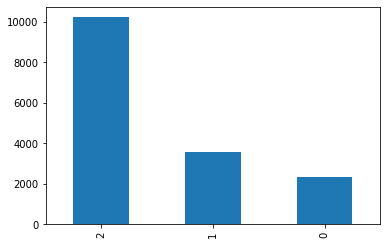

In [ ]:
y_data.value_counts().plot(kind='bar')

# NLP

In [ ]:
x_temp = x_train
x_temp.str.replace('[가-힣ㄱ-ㅎㅠ ]','')

In [ ]:
x_temp

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다']


In [ ]:
x_train_small = x_train[0:5000]

In [ ]:
sentance = list()
stopwords = ['도','는','다','의','가','이','은','한','에','하','고','을','를','인','듯','과','와','네','들','듯','지','임','게',',','.',"'",'↑','↓','"', '美','中','…','·','%','[',']']

for tok in x_train_small:
  encoded = mecab.morphs(tok)
  sentance.append([item for item in encoded if item not in stopwords])

# Tokenizer

In [ ]:
print(sentance)

In [ ]:
import tensorflow as tf

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.word_index

In [ ]:
tokenizer.word_counts

In [ ]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value # 전체 단어의 수
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어의 수

In [ ]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(5901, 3388, 57.413997627520764, 8.645642293278048)

In [ ]:
vocab_size = total_cnt - rare_cnt

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.index_word

In [ ]:
x_train_small = tokenizer.texts_to_sequences(sentance)

In [ ]:
len(x_train_small[0]), len(x_train_small[30]), len(x_train_small[40])

(10, 5, 7)

In [ ]:
hist_len = [len(words) for words in x_train_small]

(array([ 10.,   0.,  74.,   0.,   0., 217.,   0.,   0., 493.,   0.,   0.,
        687.,   0.,   0., 788.,   0.,   0., 736.,   0.,   0., 632.,   0.,
          0., 512.,   0.,   0., 408.,   0.,   0., 201.,   0.,   0., 122.,
          0.,   0.,  68.,   0.,   0.,  28.,   0.,   0.,  15.,   0.,   0.,
          6.,   0.,   0.,   2.,   0.,   1.]),
 array([ 4.  ,  4.34,  4.68,  5.02,  5.36,  5.7 ,  6.04,  6.38,  6.72,
         7.06,  7.4 ,  7.74,  8.08,  8.42,  8.76,  9.1 ,  9.44,  9.78,
        10.12, 10.46, 10.8 , 11.14, 11.48, 11.82, 12.16, 12.5 , 12.84,
        13.18, 13.52, 13.86, 14.2 , 14.54, 14.88, 15.22, 15.56, 15.9 ,
        16.24, 16.58, 16.92, 17.26, 17.6 , 17.94, 18.28, 18.62, 18.96,
        19.3 , 19.64, 19.98, 20.32, 20.66, 21.  ]),
 <a list of 50 Patch objects>)

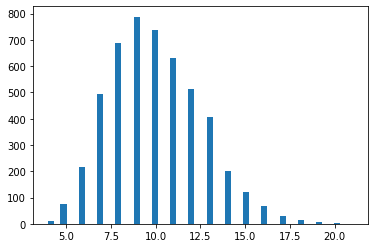

In [ ]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

In [ ]:
sum(hist_len) / len(x_train_small)

10.0328

In [ ]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [ ]:
y_train_small = y_train[0:5000]

In [ ]:
import numpy as np
np.unique(y_train_small)

array([0, 1, 2])

In [ ]:
y_train_small = np.array(y_train_small)
np.unique(y_train_small)

array([0, 1, 2])

In [ ]:
len(x_train_small), len(y_train_small)

(5000, 5000)

# make model

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
hist = model.fit(x_train_small, y_train_small, epochs=20, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/20
14/14 [==============================] - 8s 388ms/step - loss: 0.9798 - acc: 0.6120 - val_loss: 0.9158 - val_acc: 0.6267
Epoch 2/20
14/14 [==============================] - 5s 335ms/step - loss: 0.8927 - acc: 0.6346 - val_loss: 0.8822 - val_acc: 0.6267
Epoch 3/20
14/14 [==============================] - 5s 337ms/step - loss: 0.8414 - acc: 0.6346 - val_loss: 0.8114 - val_acc: 0.6267
Epoch 4/20
14/14 [==============================] - 5s 341ms/step - loss: 0.7169 - acc: 0.6540 - val_loss: 0.6876 - val_acc: 0.6767
Epoch 5/20
14/14 [==============================] - 5s 336ms/step - loss: 0.5714 - acc: 0.7463 - val_loss: 0.5830 - val_acc: 0.7647
Epoch 6/20
14/14 [==============================] - 5s 335ms/step - loss: 0.4254 - acc: 0.8451 - val_loss: 0.5194 - val_acc: 0.8127
Epoch 7/20
14/14 [==============================] - 5s 334ms/step - loss: 0.3141 - acc: 0.8963 - val_loss: 0.5009 - val_acc: 0.8240
Epoch 8/20
14/14 [==============================] - 5s 333ms/step - loss: 0.

In [ ]:
okt = konlpy.tag.Okt()
acps = list()

for title in x_data:
  new_sentence = okt.morphs(title, stem=True)
  new_sentence = [ tok for tok in new_sentence if tok not in stopwords ]

  vob_size = len(tokenizer.word_index)

  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = tf.keras.preprocessing.sequence.pad_sequences(encoded, maxlen=50)

  score = model.predict(pad_new)
  acp = np.argmax(score)

  if acp == 0:
    acps.append('부정')
  elif acp == 1:
    acps.append('중립')
  else:
    acps.append('긍정')
acps

In [ ]:
len(acps)

16169

In [ ]:
acps = pd.DataFrame(acps, columns=['pred'])

In [ ]:
add_acp = pd.concat([label_data, acps], axis=1)
add_acp

,id,date,time,title,content,press,posi_nega,stock,label,pred
0,1,2021-08-11,15:39,북한 한미연합훈련 맹비난에 경협주 하락(종합),[그래픽] 최근 남북관계 주요 일지(서울=연합뉴스) 이재윤 기자 = 김영철 노동당 ...,연합뉴스,posi_nega,stock,0,부정
1,2,2021-08-11,15:36,"원티드랩, 코스닥 상장 첫날 '따상' 성공(종합)",원티드랩[프레인키웨스트 제공. 재판매 및 DB금지](서울=연합뉴스) 이미령 기자 =...,연합뉴스,posi_nega,원티드랩,2,긍정
2,3,2021-08-11,14:38,가비아 COM 도메인 다년 연장 이벤트,9월 1일부터 .com 도메인 7% 인상향후 8년에 걸쳐 인상 예정[가비아 제공][...,헤럴드경제,posi_nega,가비아,1,중립
3,4,2021-08-11,14:37,"한솔로지스틱스, 해상운임 급등에 순익 8배…재평가 기대",한솔로지스틱스가 강세다. 2분기 실적 개선 소식이 주가에 영향을 준 것으로 보인다....,아시아경제,posi_nega,한솔로지스틱스,2,긍정
4,5,2021-08-11,14:19,"엔지켐생명과학, 경구형 코로나 치료제 호주서 상용화 첫발 소식에 강세",[파이낸셜뉴스]코로나19 4차 대유행 속 게임체인저로 꼽히는 머크의 코로나19 치료...,파이낸셜뉴스,posi_nega,엔지켐생명과학,1,긍정
...,...,...,...,...,...,...,...,...,...,...
16164,7990,2019-02-27,09:14,막 오르는 2차 북미 정상회담 …경협주도 연일 들썩,[머니투데이 진경진 기자] 2차 북·미 정상회담을 맞아 남북 경협 관련 주식들이 연...,머니투데이,posi_nega,stock,1,중립
16165,7991,2019-02-27,09:14,"바이로메드, 임상결과 지연 소식에 하락세",[이데일리 이광수 기자] 바이로메드(084990)가 주력 파이프라인인 VM202-D...,이데일리,posi_nega,stock,0,부정
16166,7992,2019-02-27,09:13,"에이치엔티, 300억원 투자유치 소식에 상한가",[머니투데이 김사무엘 기자] 에이치엔티가 총 300억원 규모의 전환사채 발생과 유상...,머니투데이,posi_nega,에이치엔티,2,긍정
16167,7993,2019-02-27,09:13,"에이치엔티, 300억 CB·유증 발행 소식에 상한가",[이데일리 이명철 기자] 최대주주 변경 계약을 맺은 에이치엔티(176440)가 대규...,이데일리,posi_nega,에이치엔티,2,긍정


In [ ]:
def search_title(title):

  okt = konlpy.tag.Okt()

  new_sentence = okt.morphs(title, stem=True)
  new_sentence = [ tok for tok in new_sentence if tok not in stopwords ]

  vob_size = len(tokenizer.word_index)

  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = tf.keras.preprocessing.sequence.pad_sequences(encoded, maxlen=50)

  score = model.predict(pad_new)
  acp = np.argmax(score)

  if acp == 0:
    print('부정')
  elif acp == 1:
    print('중립')
  else:
    print('긍정')

In [ ]:
search_title('에이치엔티, 300억원 투자유치 소식에 상한가')

긍정


In [ ]:
con = sqlite3.connect('./pred_db.sqlite3')
c = con.cursor()
add_acp.to_sql('article', con, index=False)
c.close()

In [ ]:
pickle.dump(stopwords, open('./stopwords.pkl', 'wb'))
pickle.dump(tokenizer, open('./tokenizer.pkl', 'wb'))
model.save('./posnev.h5')